# Mapa

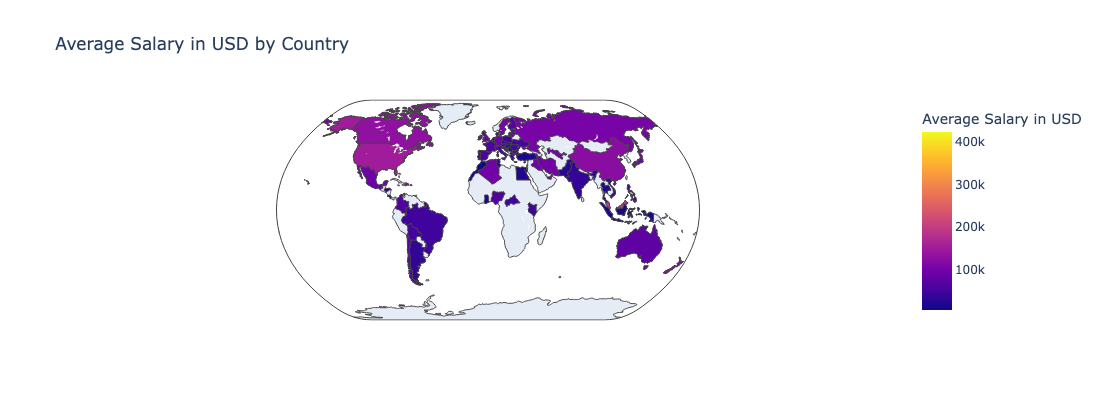

CPU times: user 77.4 ms, sys: 13.8 ms, total: 91.2 ms
Wall time: 174 ms


In [3]:
%%time
# import necessary libraries
import pandas as pd
import plotly.express as px
import pycountry

# load data stored in a CSV file
df = pd.read_csv('data/ds_salaries.csv')

# Convert two-letter country codes to three-letter codes
df['employee_residence'] = df['employee_residence'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)

# Group by 'employee_residence' and calculate the average 'salary_in_usd'
avg_salaries = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Create a world heatmap
fig = px.choropleth(avg_salaries, locations='employee_residence',
                    color='salary_in_usd',
                    hover_name='employee_residence',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Salary in USD by Country',
                    labels={'salary_in_usd':'Average Salary in USD'},
                    width=800, 
                    height=400,
                    projection='natural earth')


fig.show()